In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os
from PIL import Image
from IPython.display import display
import cv2
import glob
import shutil
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassava-leaf-disease-classification/sample_submission.csv
/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json
/kaggle/input/cassava-leaf-disease-classification/train.csv
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train14-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train13-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train04-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train01-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train08-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train00-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train10-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train02-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train15-1327.tf

/kaggle/input/cassava-leaf-disease-classification/train_images/4255100884.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1383472035.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1633537888.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2329255732.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2892520196.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2394755091.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/843818406.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2983992918.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4103274356.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/477484606.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2963247427.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/93955818.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/24018

/kaggle/input/cassava-leaf-disease-classification/train_images/2367376740.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4089978663.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3904457207.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2028419777.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1940940893.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3101248126.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1396847821.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4103177818.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2542096748.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1931239893.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/19090141.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1691850232.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/103

/kaggle/input/cassava-leaf-disease-classification/train_images/3375409497.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2855378475.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/814026139.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3340835800.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2927616574.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2428748411.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/897533656.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2053079432.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/554488826.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/901196930.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1546491246.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/498491072.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/207069

/kaggle/input/cassava-leaf-disease-classification/train_images/3415144054.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4182987199.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/413123167.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/461042131.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2378730150.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1904799311.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3966311153.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4274689672.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2997861591.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/79165028.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4221104214.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2092002351.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/64730

/kaggle/input/cassava-leaf-disease-classification/train_images/693711677.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1931682114.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2837844758.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1635220625.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3892268539.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1935951907.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2680198267.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4181129288.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4073523035.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2212294239.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/987636835.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2763974750.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/371

/kaggle/input/cassava-leaf-disease-classification/train_images/3635870628.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1362176870.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2241165356.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1251549762.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/291604764.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/718245684.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/739247147.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3595601854.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4199179186.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2582937466.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/686214048.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3789409909.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/23827

/kaggle/input/cassava-leaf-disease-classification/train_images/3753699020.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3792024125.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3228683879.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1403954196.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3149092029.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/580859644.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3876878549.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/271724485.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3696011777.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2373622965.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2036664947.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1937128156.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/189

/kaggle/input/cassava-leaf-disease-classification/train_images/185241766.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2794995428.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3739148870.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4022000067.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3571228905.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/138459723.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3986415473.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/4252539994.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2590010123.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2189559385.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2648790946.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2839789012.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/857

/kaggle/input/cassava-leaf-disease-classification/train_images/2082251851.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2408092711.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3003805645.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1024504187.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3455364465.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/420653130.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/3115055353.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/2511157697.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1465778841.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/901404486.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1268934820.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/1107481034.jpg
/kaggle/input/cassava-leaf-disease-classification/train_images/226

In [3]:
pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-py3-none-any.whl size=16033 sha256=5641c15e158c094b5de8543b3a9aa3142aa3913f52a92b2405a9f94a2e2612f5
  Stored in directory: /root/.cache/pip/wheels/b7/cc/0d/41d384b0071c6f46e542aded5f8571700ace4f1eb3f1591c29
Successfully built efficientnet-pytorch
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [90]:

train_transform = transforms.Compose([
   transforms.RandomRotation(10),
   transforms.RandomHorizontalFlip(),
   transforms.Resize(528),
   transforms.CenterCrop(528),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]) 
])

In [91]:
test_transform = transforms.Compose([
   transforms.Resize(528),
   transforms.CenterCrop(528),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [8]:
df = pd.read_csv('/kaggle/input/cassava-leaf-disease-classification/train.csv')

In [9]:
df0 = df[df['label']==0]

In [10]:
df1 = df[df['label']==1]

In [11]:
df2 = df[df['label']==2]

In [12]:
df3 = df[df['label']==3]

In [13]:
df4 = df[df['label']==4]

In [14]:
CBB_0 = df0['image_id']
CBSD_1 = df1['image_id']
CGM_2 = df2['image_id']
CMD_3 = df3['image_id']
Healty_4 = df4['image_id']

In [15]:
CBB_0 = list(CBB_0)
CBSD_1 = list(CBSD_1)
CGM_2 = list(CGM_2)
CMD_3 = list(CMD_3)
Healty_4 = list(Healty_4)

In [26]:
for file in glob.glob("/kaggle/input/cassava-leaf-disease-classification/train_images/*.jpg"):
    if file.split("/")[5] in CBB_0:
        image = Image.open(file)
        image.save("/kaggle/working/data/0/{}".format(file.split("/")[5]))

In [27]:
for file in glob.glob("/kaggle/input/cassava-leaf-disease-classification/train_images/*.jpg"):
    if file.split("/")[5] in CBSD_1:
        image = Image.open(file)
        image.save("/kaggle/working/data/1/{}".format(file.split("/")[5]))

In [28]:
for file in glob.glob("/kaggle/input/cassava-leaf-disease-classification/train_images/*.jpg"):
    if file.split("/")[5] in CGM_2:
        image = Image.open(file)
        image.save("/kaggle/working/data/2/{}".format(file.split("/")[5]))

In [29]:
for file in glob.glob("/kaggle/input/cassava-leaf-disease-classification/train_images/*.jpg"):
    if file.split("/")[5] in CMD_3:
        image = Image.open(file)
        image.save("/kaggle/working/data/3/{}".format(file.split("/")[5]))

In [33]:
for file in glob.glob("/kaggle/input/cassava-leaf-disease-classification/train_images/*.jpg"):
    if file.split("/")[5] in Healty_4:
        image = Image.open(file)
        image.save("/kaggle/working/data/4/{}".format(file.split("/")[5]))

In [66]:
root = '/kaggle/working/data'

train_data = datasets.ImageFolder(root,transform=train_transform)

class_names = train_data.classes # specify classes

In [67]:
len(train_data)

21397

In [68]:
len(train_data)*0.8

17117.600000000002

In [69]:
len(train_data)*0.1

2139.7000000000003

In [70]:
class_names

['0', '1', '2', '3', '4']

In [71]:
train, val, test = torch.utils.data.random_split(train_data, [17117, 2140, 2140])

In [72]:
train_loader = DataLoader(train,batch_size=10,shuffle=True,pin_memory=True)
test_loader = DataLoader(val,batch_size=10,pin_memory=True)

In [73]:
for i,(images,labels) in enumerate(train_loader):
    break

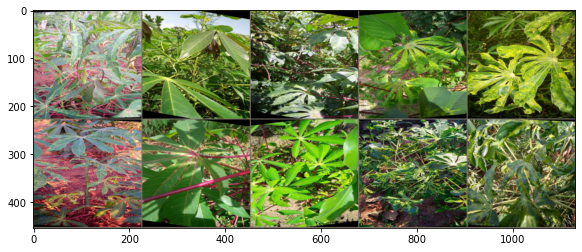

In [74]:
im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)))

In [75]:
images.shape

torch.Size([10, 3, 224, 224])

In [140]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,5)
        
    def forward(self,X):
        
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [142]:
model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [144]:
model = model.to(device)

In [143]:
for param in model.parameters():
    print(param.numel())

162
6
864
16
5598720
120
10080
84
420
5


In [170]:
import time
start_time = time.time()

epochs = 5

#Limits on numbers of batches if you want train faster(Not mandatory)
#max_trn_batch = 800 # batch 10 image --> 8000 images total
#max_tst_batch = 200 # batch 10 image --> 3000 images total


train_losses = []
test_losses = []
train_correct = []
test_correct = []
accuracy = []

for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        X_train,y_train = X_train.to(device),y_train.to(device)
        

        b = b + 1
        
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr = trn_corr + batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print('Epoch:  {} Loss:  {} Accuracy:  {}'.format(i,loss,trn_corr.item()*100/(10*b)))
            accuracy.append((trn_corr//(b/10)))

            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    #test set
    
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            X_test,y_test = X_test.to(device),y_test.to(device)

            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + batch_corr
    
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            
    
total_time = time.time() - start_time
print(f'Total Time: {total_time/60}) minutes')

Epoch:  0 Loss:  0.17260919511318207 Accuracy:  88.65
Epoch:  0 Loss:  0.029059678316116333 Accuracy:  88.375
Epoch:  0 Loss:  0.11816234886646271 Accuracy:  88.03333333333333
Epoch:  0 Loss:  0.4391072392463684 Accuracy:  87.75
Epoch:  0 Loss:  0.27339833974838257 Accuracy:  87.67
Epoch:  0 Loss:  0.1916726529598236 Accuracy:  87.63333333333334
Epoch:  0 Loss:  0.3495357930660248 Accuracy:  87.47142857142858
Epoch:  0 Loss:  0.7721829414367676 Accuracy:  87.4875
Epoch:  1 Loss:  0.0774635523557663 Accuracy:  87.6
Epoch:  1 Loss:  0.3420831263065338 Accuracy:  88.55
Epoch:  1 Loss:  0.2285238802433014 Accuracy:  88.6
Epoch:  1 Loss:  0.1535884588956833 Accuracy:  88.5625
Epoch:  1 Loss:  0.3487563133239746 Accuracy:  88.68
Epoch:  1 Loss:  0.5656754970550537 Accuracy:  88.49166666666666
Epoch:  1 Loss:  0.07041757553815842 Accuracy:  88.40714285714286
Epoch:  1 Loss:  0.3908877372741699 Accuracy:  88.2375
Epoch:  2 Loss:  0.05901116132736206 Accuracy:  88.7
Epoch:  2 Loss:  0.540819048

In [171]:
torch.save(model.state_dict(),'Cassiva_model2.pt')

In [172]:
PATH = "/kaggle/working/model2.pt"

In [173]:
torch.save({
            'epoch': 30,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            },PATH)

In [174]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.train()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)